In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report


In [15]:
df=pd.read_csv("blogs.csv")

In [17]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [19]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [21]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [31]:
df["len"]=df["Data"].apply(len)
df

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197


In [29]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [114]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK datasets (only run once)
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess_text(Data):
    # Convert to lowercase
    text = Data.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(Data)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Display a sample of the cleaned text
print(df[['Data', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  Path : cantaloupe.srv.cs.cmu.edu ! magnesium.c...  
1  Newsgroups : alt.atheism Path : cantaloupe.srv...  
2  Path : cantaloupe.srv.cs.cmu.edu ! das-news.ha...  
3  Path : cantaloupe.srv.cs.cmu.edu ! magnesium.c...  
4  Xref : cantaloupe.srv.cs.cmu.edu alt.atheism:5...  


In [115]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the categories into numerical labels
y = encoder.fit_transform(df['Data'])

# Display the first few encoded labels
print(y[:5])


[1192   14 1088 1252 1447]


In [116]:
# Assuming the correct column names are 'Data' for the features and 'Labels' for the target labels
y= encoder.fit_transform(df['Data'])

# Display the first few encoded labels
print(x[:5])


[0 0 0 0 0]


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [119]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)
(1600,)
(400,)


In [120]:
# Reshape if necessary
x_train = x_train.reshape(-1, 1)  # Reshape to a 2D array
x_test = x_test.reshape(-1, 1)


In [121]:
print(x_train.shape)
print(x_test.shape)

(1600, 1)
(400, 1)


In [122]:
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00

E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricW

In [123]:
accuracy_score(y_test,y_pred)

0.0

In [112]:
classification_report(y_test,y_pred)

E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\LDPlayer\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricW

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n          10       0.00      0.00      0.00       1.0\n          11       0.00      0.00      0.00       1.0\n          15       0.00      0.00      0.00       1.0\n          18       0.00      0.00      0.00       1.0\n          24       0.00      0.00      0.00       1.0\n          30       0.00      0.00      0.00       1.0\n          35       0.00      0.00      0.00       1.0\n          38       0.00      0.00      0.00       1.0\n          39       0.00      0.00      0.00       1.0\n          43       0.00      0.00      0.00       1.0\n          46       0.00      0.00      0.00       1.0\n          49       0.00      0.00      0.00       1.0\n          54       0.00      0.00      0.00       1.0\n          64       0.00      0.00      0.00       1.0\n          65       0.00      0.00      0.00       1.0\n          69       0.00      0.00      0.00       1.0\n       

In [134]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Ensure that VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each blog post
df['sentiment_score'] = df['Data'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the compound score
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display the first few rows of the dataframe with sentiment labels
print(df[['Data', 'sentiment']].head())



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...


                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


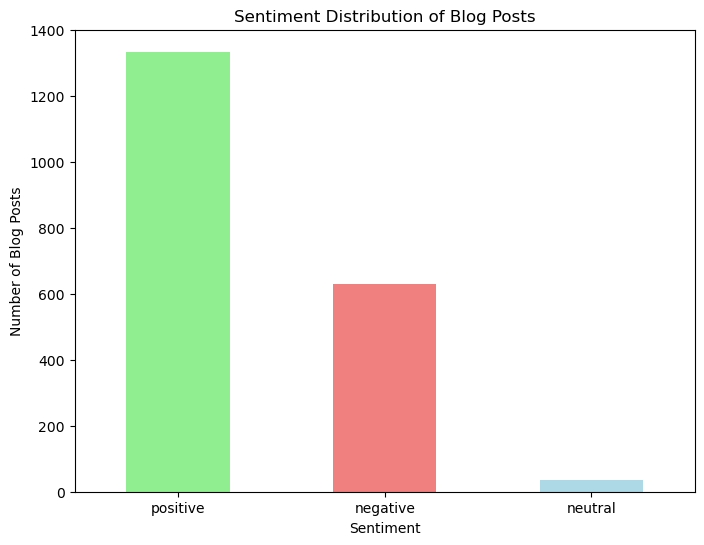

sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


In [138]:
# Plot the distribution of sentiments
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=0)
plt.show()

# Display the sentiment distribution
print(sentiment_counts)
